Ideas for how to implement simple two-layer climate model with interactive components
========

Useful info:
* https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
* (possibly) https://stackoverflow.com/questions/31911884/interactive-plots-placement-in-ipython-notebook-widget

TODO: 
* Better control layout - nice to get some sort of grid.
* Check/compare model output with Excel.
* Get obs data as CSV and compare against obs.
* Fit model against obs using minimization.
* Get updated AR6 forcing data.
* Get SSP scenario data for future.
* Dropdown for SSP scenario.
* Check it works using AppsAnywhere on windows.
* Simple instructions on how to get working.

Updates:
* 29/7/22: Initial playing. Import forcing data (exported from Excel as CSV). Implement simple model which is a copy of the Excel CLIMATE MODEL tab. Get interactive controls working with checkboxes and sliders.

In [1]:
from climate_model import ClimateModel
cm = ClimateModel()
cm.display_controls()

interactive(children=(Checkbox(value=True, description='CO2'), Checkbox(value=True, description='Other well mi…

Experiments below
----------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
consts = dict(
    lam = 0.08,  # K (W m-2)-1
    d_m = 100,   # m
    d_d = 900,   # m
    K = 1e-4,    # m2 s-1
    rho = 1000,  # kg m-3
    c_p = 4218,  # J kg-1 K-1
    dt = 365.2422 * 86400, # s
)

In [15]:
def update_T(dTm, dTd, dF, dt, lam, d_m, d_d, K, rho, c_p):
    C_m = rho * c_p * d_m
    C_d = rho * c_p * d_d
    D = K * rho * c_p * ((dTm - dTd) / (0.5 * (d_m + d_d)))
    dTm = dTm + dt / C_m * (dF - dTm / lam - D)
    dTd = dTd + dt / C_d * D
    return dTm, dTd

In [10]:
update_T(0, 0, 0.5, **consts)

31556926.080000002 0.08 100 900 0.0001 1000 4218
0.0


(0.037407451493598864, 0.0)

In [5]:
forcings = pd.read_csv('forcing_data.csv')

In [6]:
forcings.TOTAL.loc[1:]

1      0.00
2     -0.03
3     -0.05
4     -0.05
5     -0.06
       ... 
347    2.79
348    2.79
349    2.79
350    2.79
351    2.79
Name: TOTAL, Length: 351, dtype: float64

In [19]:
years = [1750]
dT = [(0, 0)]
for year, F in list(zip(forcings.YEAR.loc[2:], forcings.TOTAL[2:])):
    dT.append(update_T(dT[-1][0], dT[-1][1], F, **consts))
    years.append(year)
dT = np.array(dT)

In [23]:
forcings

,YEAR,CO2,Other well mixed GHGs,Trop. O3,Strat. O3,Direct Sulphate Aerosol,Aerosol-Cloud Interactions,Biomass Burning Aerosol,Black & Organic Carbon Aerosol,Solar,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,SCALING,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1751,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1752,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1753,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2096,1.92,1.03,0.38,-0.03,-0.36,-0.44,0.05,0.16,0.08,...,6.28,1.87,0.44,0.0,-0.09,-0.30,0.01,0.07,-0.03,0.0
348,2097,1.92,1.03,0.38,-0.03,-0.36,-0.44,0.05,0.16,0.08,...,6.33,1.87,0.44,0.0,-0.09,-0.30,0.01,0.07,0.02,0.0
349,2098,1.92,1.03,0.38,-0.03,-0.36,-0.44,0.05,0.16,0.08,...,6.38,1.88,0.44,0.0,-0.09,-0.30,0.01,0.07,0.09,0.0
350,2099,1.92,1.03,0.38,-0.03,-0.36,-0.44,0.05,0.16,0.08,...,6.44,1.89,0.44,0.0,-0.09,-0.30,0.01,0.07,0.13,0.0


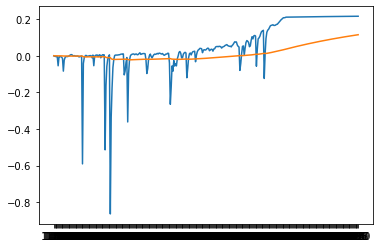

In [22]:
plt.plot(years, dT[:, 0])
plt.plot(years, dT[:, 1])

In [24]:
import ipywidgets as widgets

In [33]:
cb1 = widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False,
    indent=False
)
cb2 = widgets.Checkbox(
    value=False,
    description='Check me 2',
    disabled=False,
    indent=False
)

widgets.Box(children=[cb1, cb2])

Box(children=(Checkbox(value=False, description='Check me', indent=False), Checkbox(value=False, description='…

In [35]:
print(cb1.value)

True


In [29]:
from tests import box1

In [30]:
box1()

Box(children=(Checkbox(value=False, description='Check me', indent=False), Checkbox(value=False, description='…

In [36]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)



Button(description='Click Me!', style=ButtonStyle())

Output()

In [42]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [48]:
def f(x):
    print(x)
    plt.plot(np.arange(x)**2)

In [50]:
interact(f, x=widgets.Box(children=[widgets.IntSlider(min=1, max=30, step=1, value=10)]));

ValueError: Box(children=(IntSlider(value=10, max=30, min=1),)) cannot be transformed to a widget

In [51]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

In [54]:
w = interactive(f, a=cb1, b=20)

In [55]:
display(w)

interactive(children=(Checkbox(value=True, description='Check me', indent=False), IntSlider(value=20, descript…

In [7]:
consts

{'lam': 0.08,
 'd_m': 100,
 'd_d': 900,
 'K': 0.0001,
 'rho': 1000,
 'c_p': 4218,
 'dt': 31556926.080000002}

In [2]:
columns = cm.forcings.columns[1:11].as_list()

NameError: name 'cm' is not defined